# Avacado Project
PROBLEM STATEMENT:

Avocado is a fruit consumed by people heavily in the United States. This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

# Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

The dataset is having 18249 rows and 14 columns

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There ar no null values in dataset

In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [8]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [9]:
#Encoding categorical columnsO

In [10]:
# from sklearn.preprocessing import LabelEncoder
# enc=LabelEncoder()
# df['type']=enc.fit_transform(df['type'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [13]:
#Removing unncessary columns from dataset
df=df.drop(columns=['Date','Unnamed: 0'],axis=1)

In [14]:
#Lets separating categorical varibale and continous varibales
#Checking for Categorical columns
Cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Cat_col.append(i)
print(Cat_col)

['type', 'region']


In [15]:
# Checking for Continous columns
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print(num_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [16]:
df.shape

(18249, 12)

# EDA

conventional    9126
organic         9123
Name: type, dtype: int64


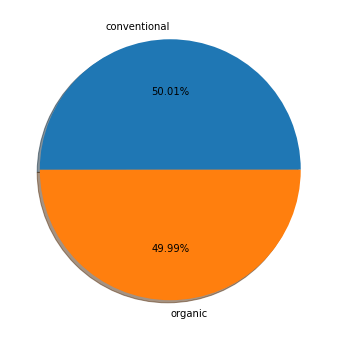

In [17]:
# Visualize the count of type of the avacado
print(df['type'].value_counts())
labels = 'conventional','organic'
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

We can observe that in type of avocado there are 50.01 % of avocados are of conventional type and 49.99 types of avocados are organics

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

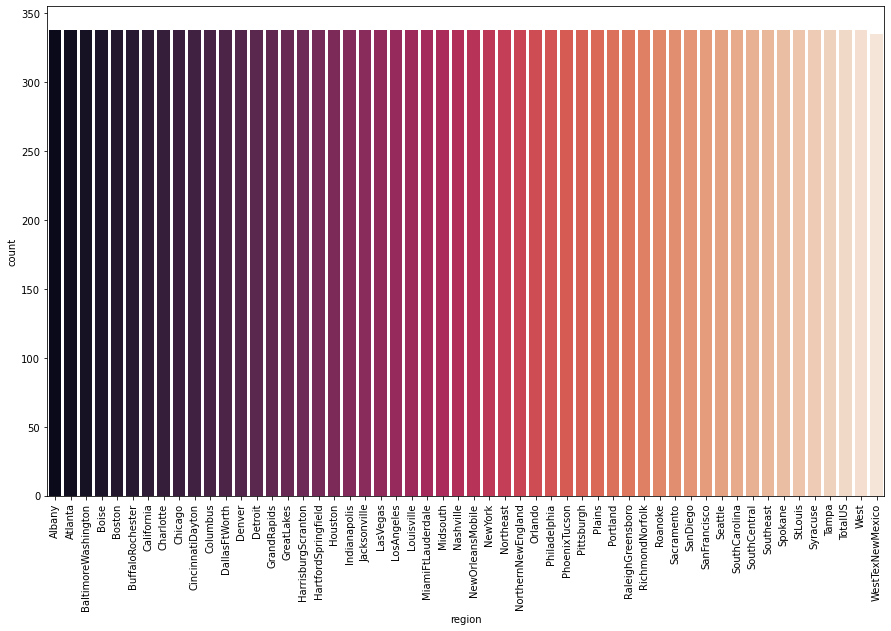

In [18]:
print(df['region'].value_counts())
plt.figure(figsize=(15,9))
sns.countplot(df['region'],palette='rocket')
plt.xticks(rotation=90)
plt.show()

In [19]:
df_cont=df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

In [20]:
df_cont.shape

(18249, 10)

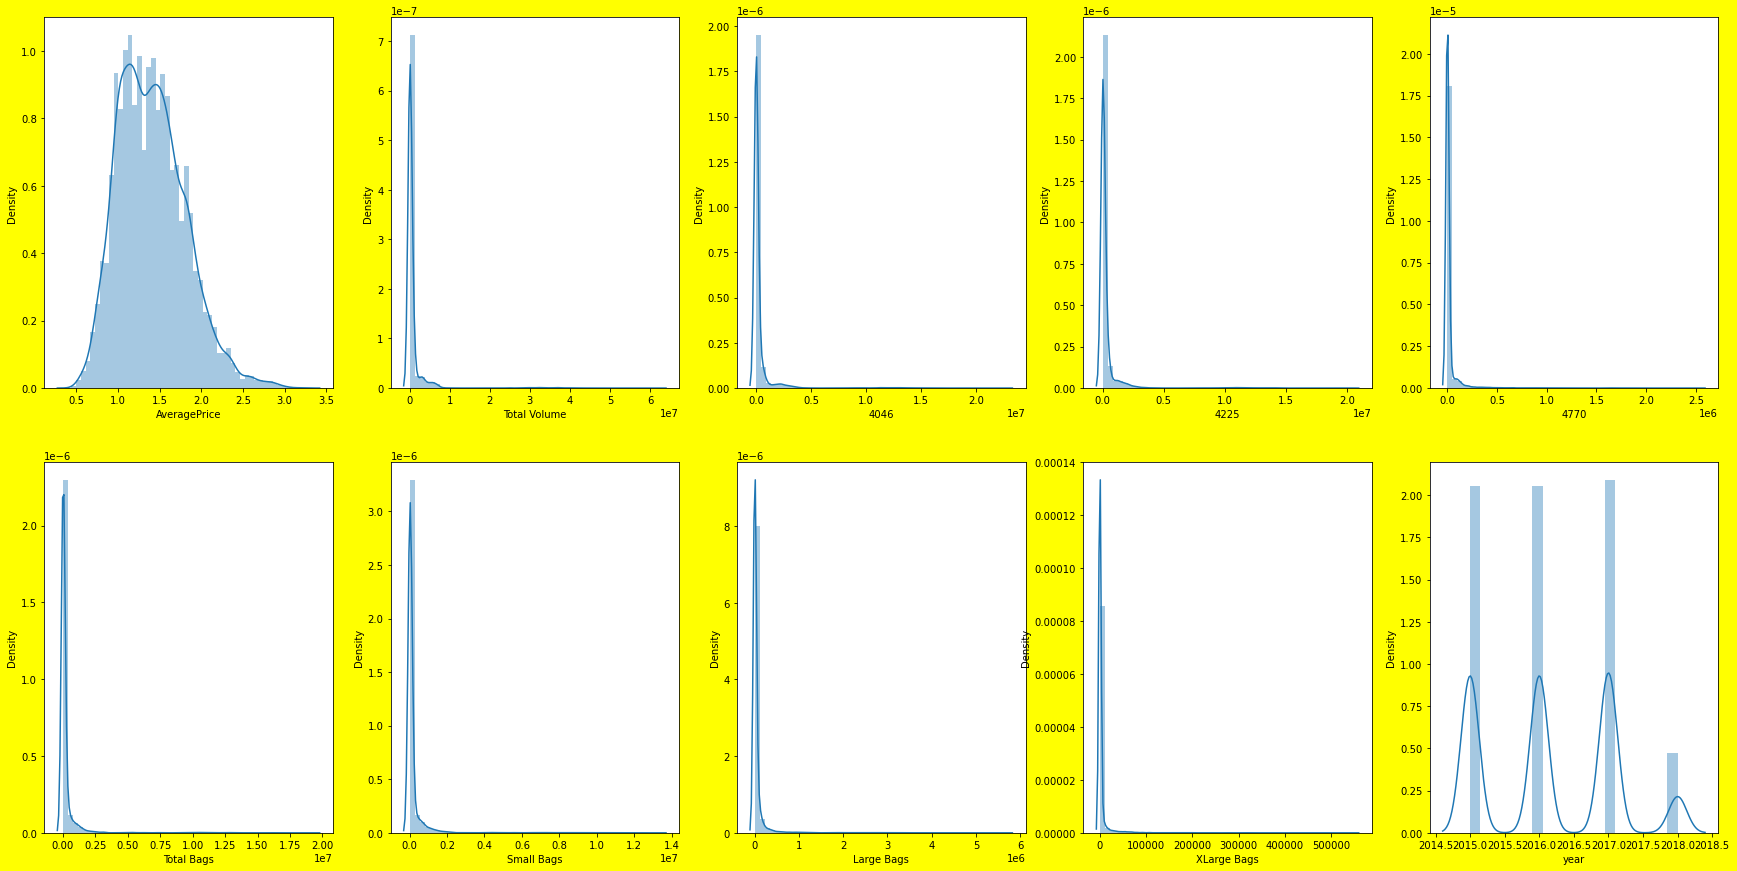

In [21]:
plt.figure(figsize=(30,15),facecolor='yellow')
plotnumber=1

for column in df_cont:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(df_cont[column])
    plotnumber=plotnumber+1

plt.show()

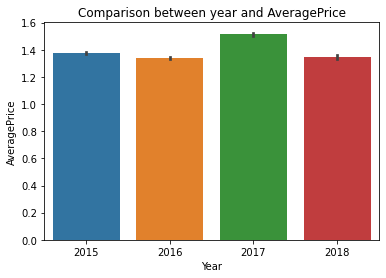

In [22]:
#Checking which year haqs maximum AveragePrice
plt.figure(figsize=(6,4))
plt.title("Comparison between year and AveragePrice")
sns.barplot(df['year'],df['AveragePrice'],data = df)
plt.xlabel("Year")
plt.ylabel("AveragePrice")
plt.show()

We can observe that highest selling  of avocados in year 2017

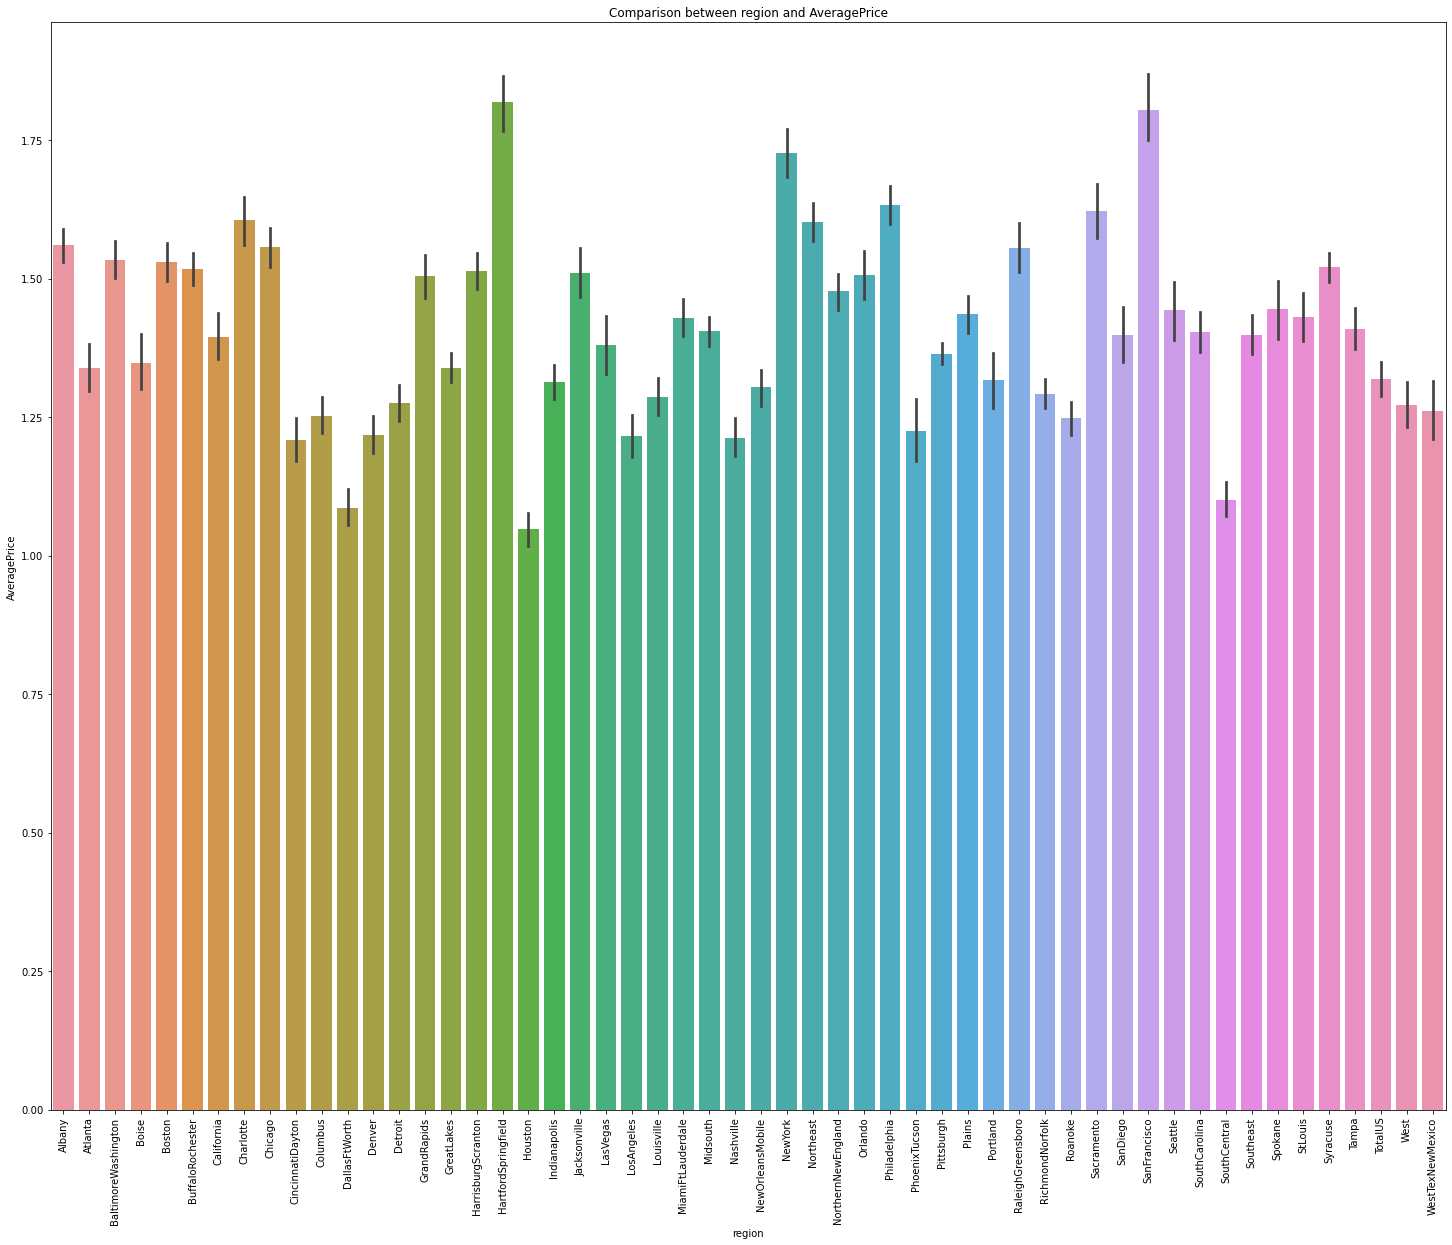

In [23]:
#Checking which region haqs maximum AveragePrice
plt.figure(figsize=(25,20))
plt.title("Comparison between region and AveragePrice")
sns.barplot(df['region'],df['AveragePrice'],data = df)
plt.xticks(rotation=90)
plt.xlabel("region")
plt.ylabel("AveragePrice")
plt.show()

We can observe that maximum selling of avocados occured in region(HartfordSpringfield)

<AxesSubplot:xlabel='Total Volume', ylabel='Total Bags'>

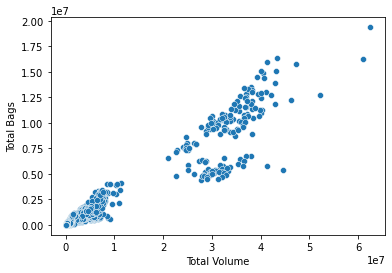

In [24]:
 sns.scatterplot(df['Total Volume'],df['Total Bags'])

We can observe that with increase in total volume Total bags also increasing

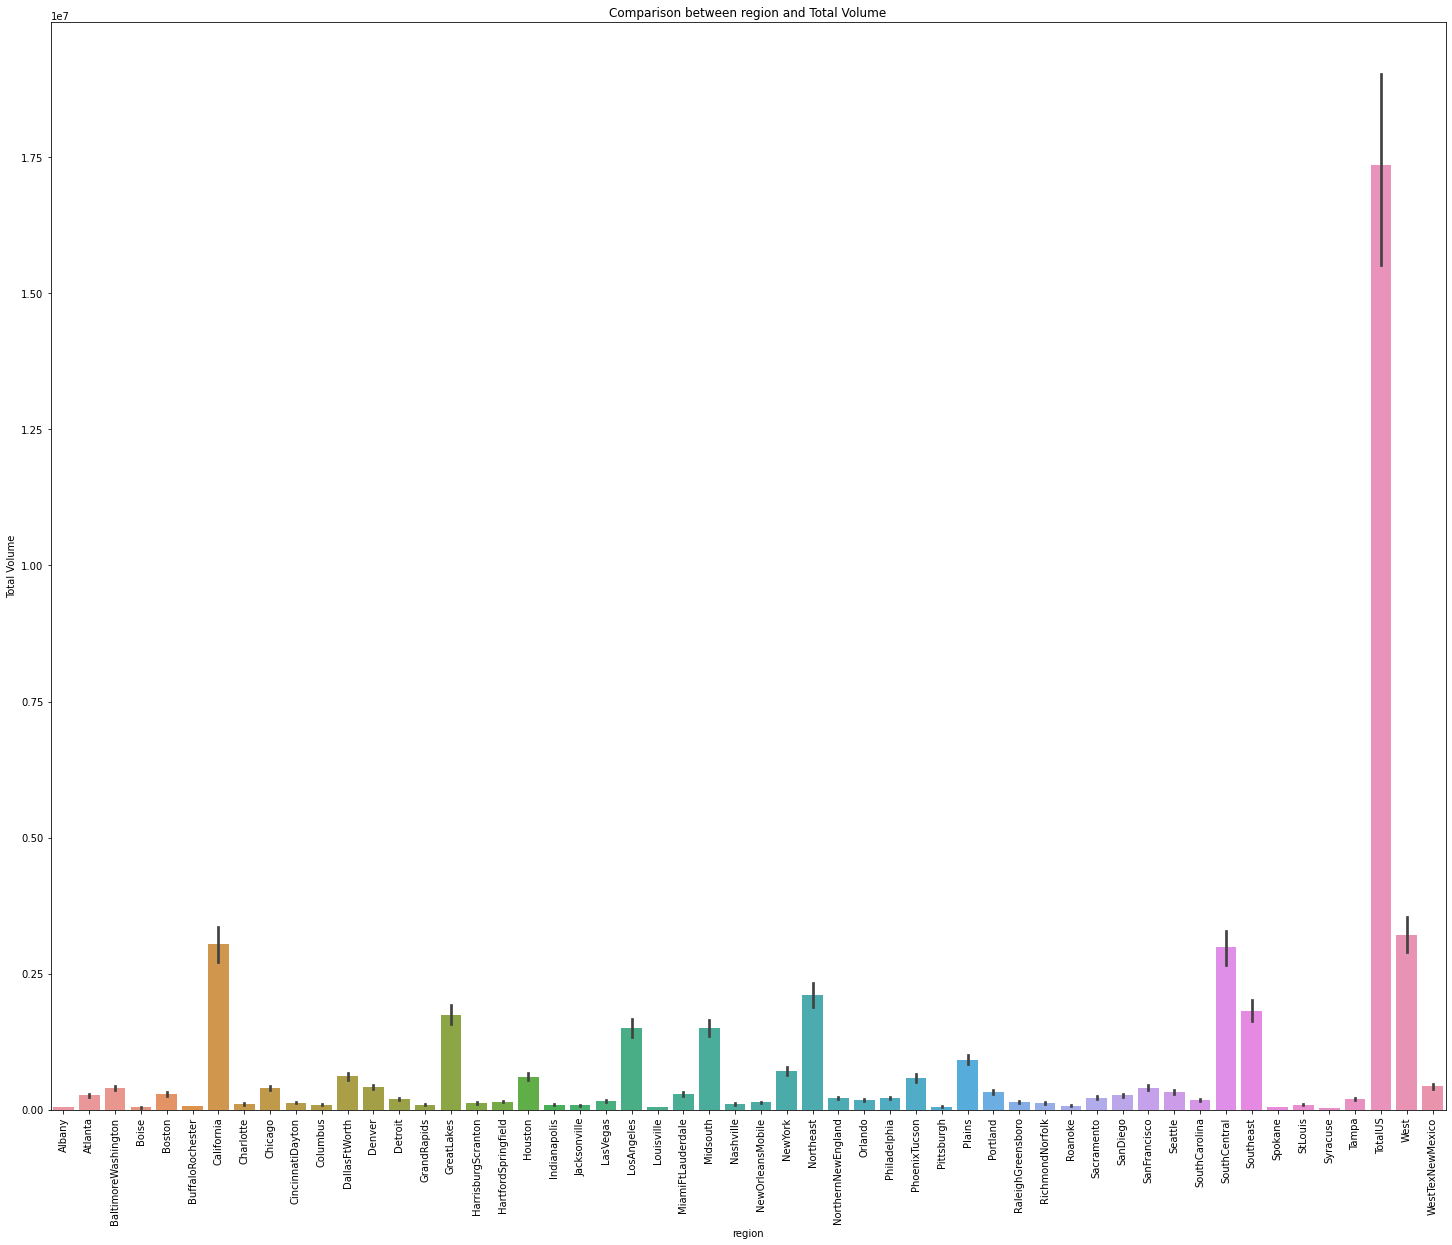

In [25]:
#Checking which region haqs maximum Total volume
plt.figure(figsize=(25,20))
plt.title("Comparison between region and Total Volume")
sns.barplot(df['region'],df['Total Volume'],data = df)
plt.xticks(rotation=90)
plt.xlabel("region")
plt.ylabel("Total Volume")
plt.show()

We can observe that maxium observations taken at region Totalus

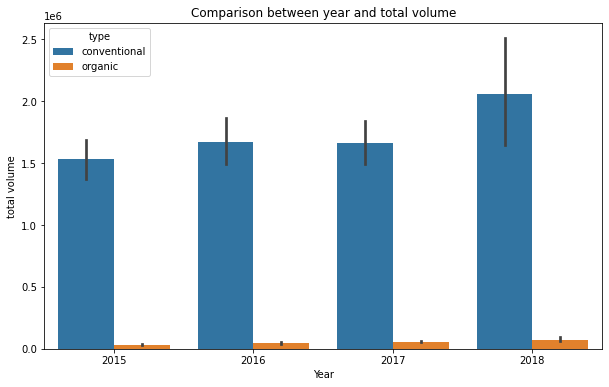

In [26]:
plt.figure(figsize=(10,6))
plt.title("Comparison between year and total volume")
sns.barplot(df['year'],df['Total Volume'],hue='type',data = df)
plt.xlabel("Year")
plt.ylabel("total volume")
plt.show()

Conventional type were sold higher than organic one , which mean demand of conventional are more than that of organic ones.

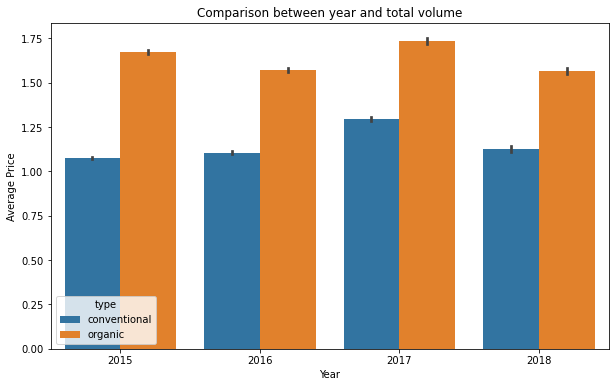

In [27]:
plt.figure(figsize=(10,6))
plt.title("Comparison between year and total volume")
sns.barplot(df['year'],df['AveragePrice'],hue='type',data = df)
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

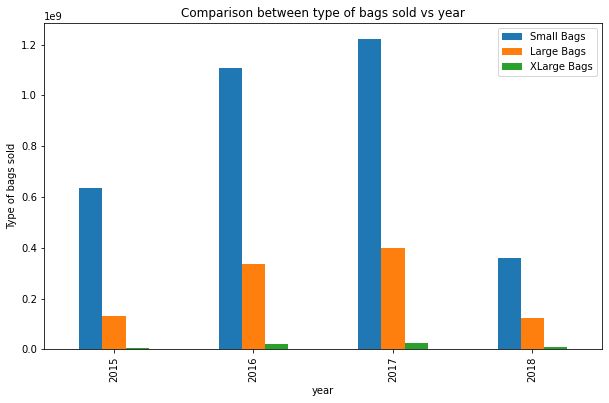

In [28]:
feature = df[['Small Bags','Large Bags','XLarge Bags']].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparison between type of bags sold vs year")
plt.xlabel('year')
plt.ylabel("Type of bags sold")
plt.show()

We can observe that maximum small bags of avocados are sold

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

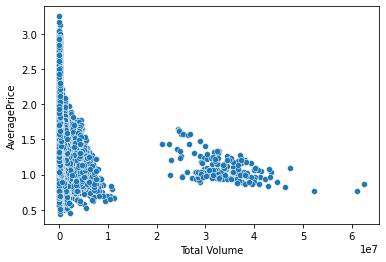

In [29]:
 sns.scatterplot(df['Total Volume'],df['AveragePrice'])

In [30]:
#Encoding categorical columnsO

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['type']=enc.fit_transform(df['type'])
df['region']=enc.fit_transform(df['region'])


# Checking for Skewness

In [31]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

# Checking for Corrrelation

### Plotting heatmap

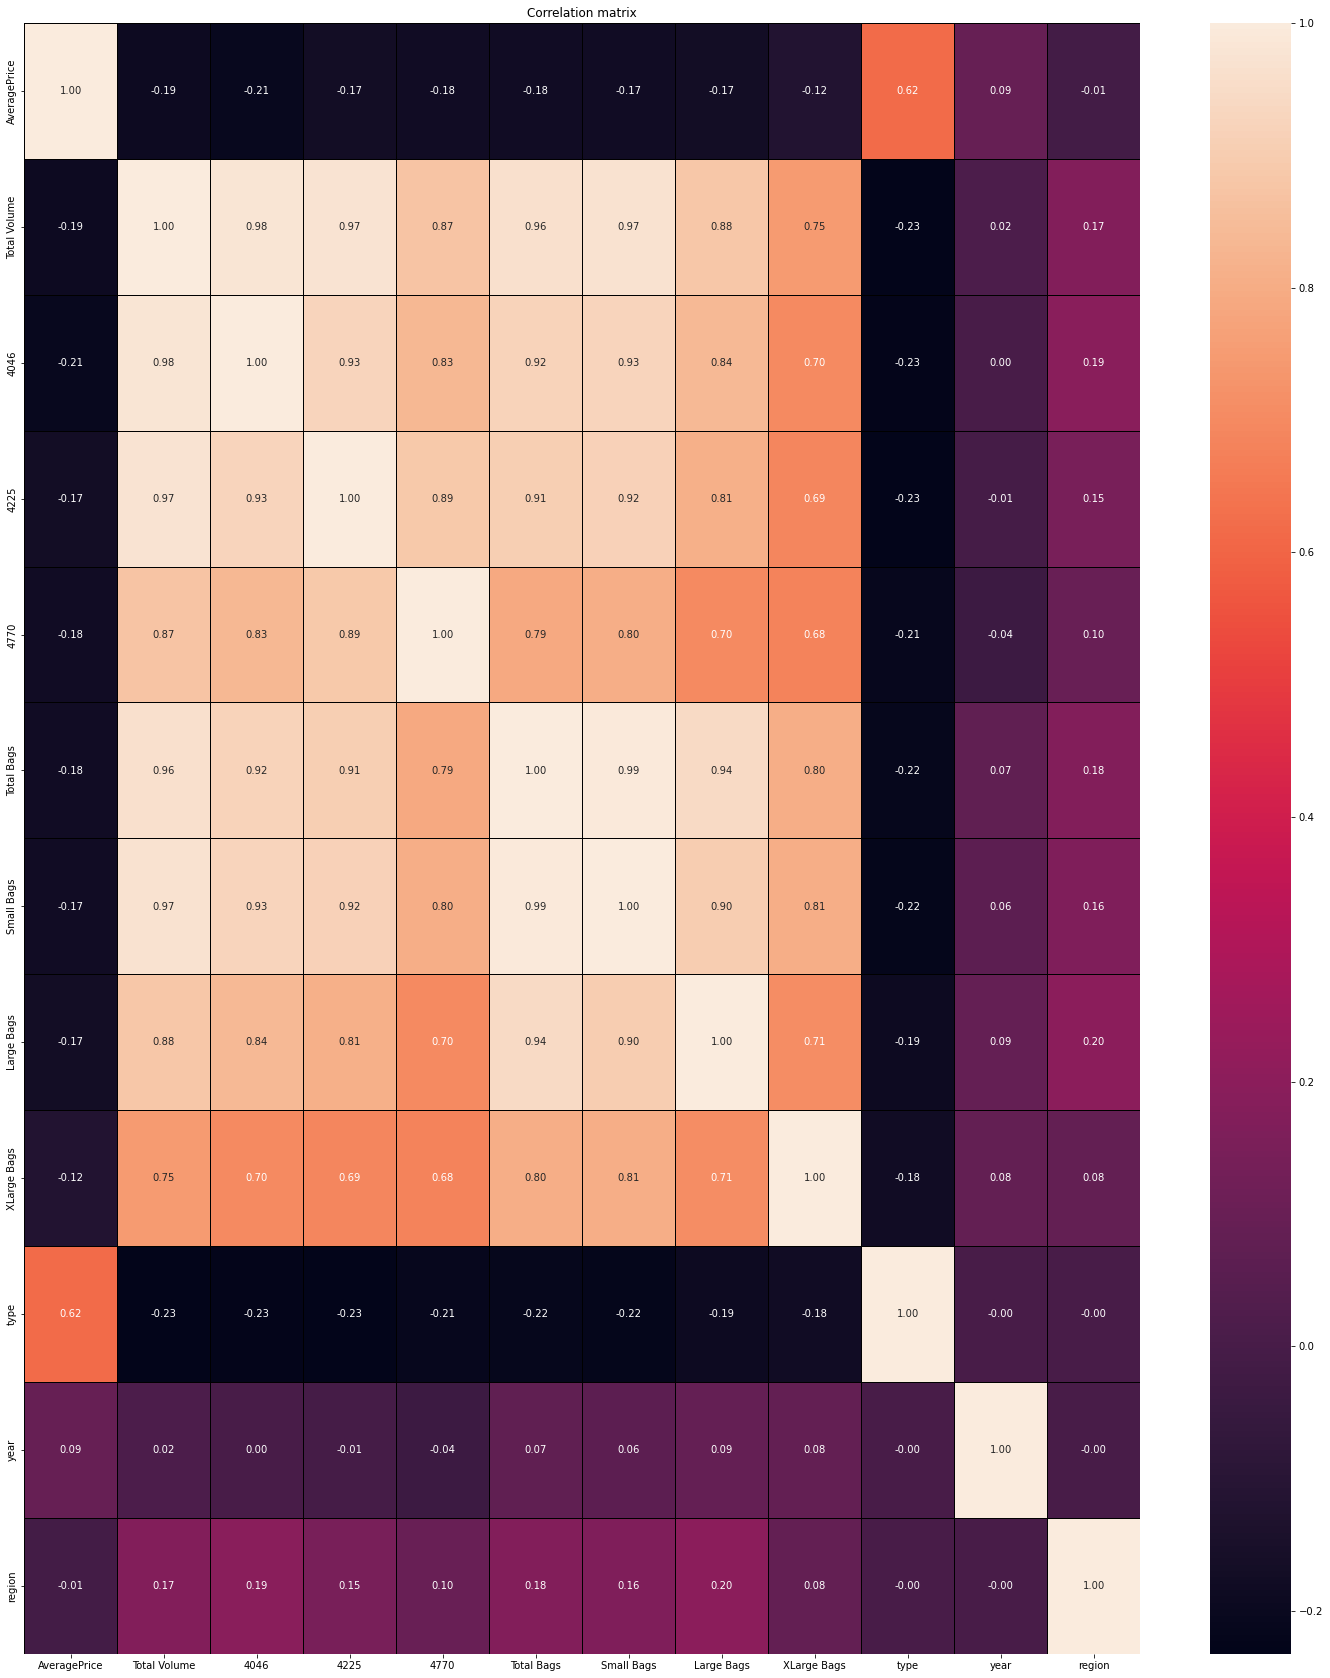

In [32]:
plt.figure(figsize=(25,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

# Checking the columns which are positively and negatively related to target varibale

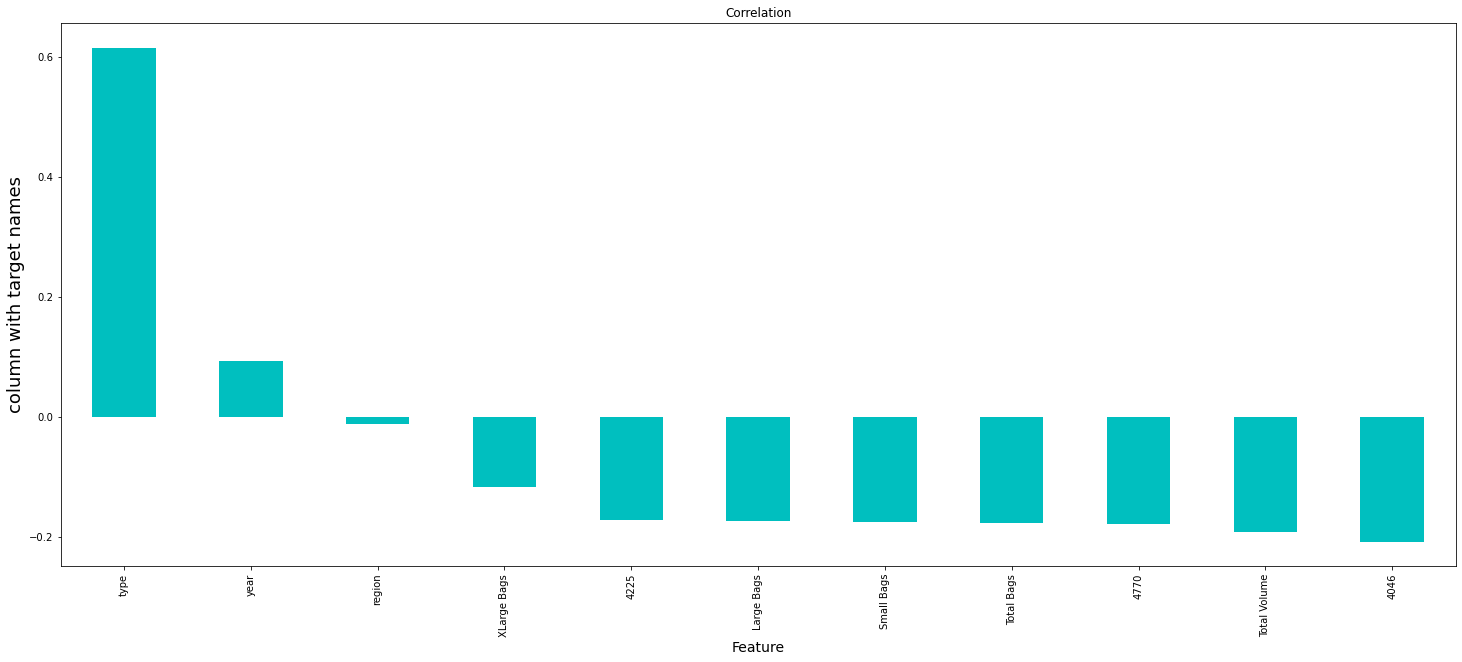

In [33]:
plt.figure(figsize=(25,10))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=18)
plt.title('Correlation')
plt.show()


# Checking for outliers

In [34]:
df.shape

(18249, 12)

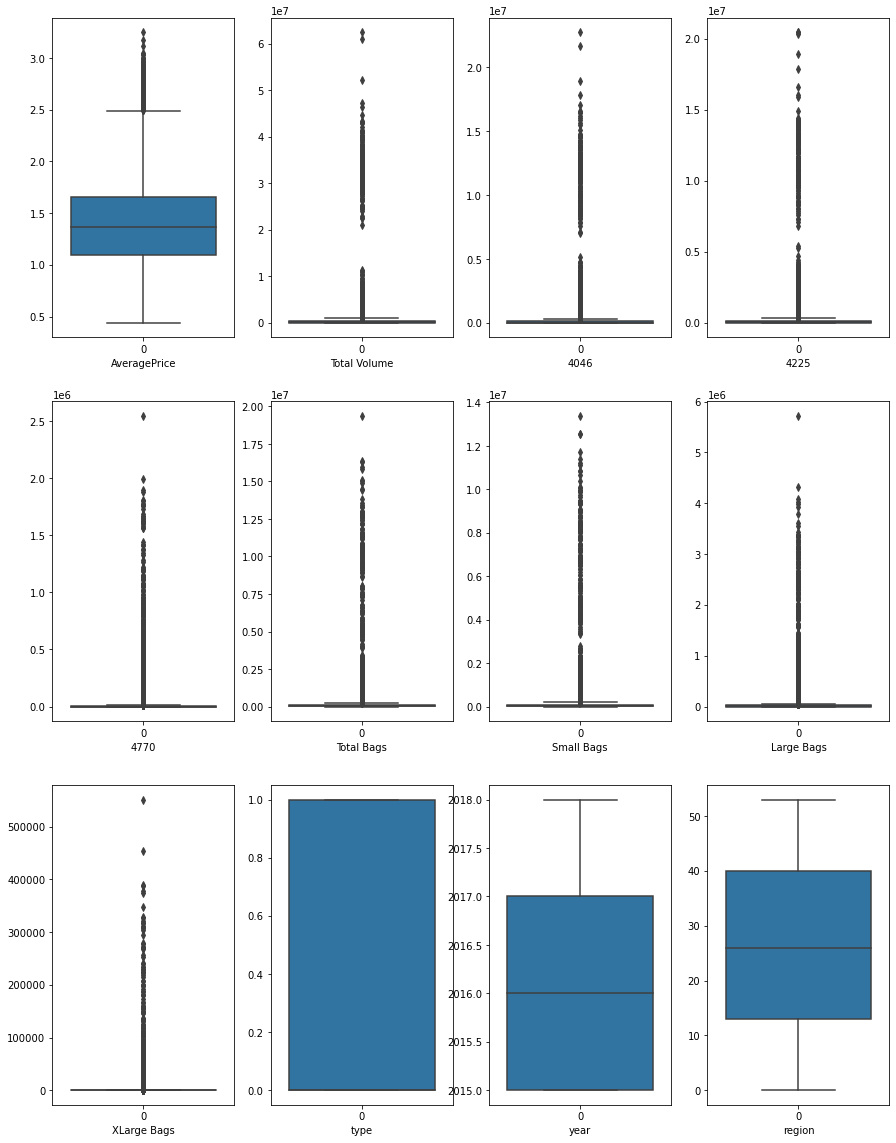

In [35]:
graph=1

plt.figure(figsize=(15,20))

for column in df:
    if graph<=12:
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
    graph+=1
plt.show()

From the above graph these columns are having outliers and need to be removed --('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags)



# Data Preprocessing

### Removing Outliers using Z-technique

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811


In [37]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (18249, 12)
new dataframe (17651, 12)
total number of rows dropped 598


### Percentage data loss

In [38]:
loss_percent=(18249-17651)/18249*100
loss_percent

3.276891884486821

Data loss is less than 10 % .So its ok to remove outliers

## Separating label and features as x and y

In [39]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [40]:
x=df_new.drop(columns=['AveragePrice','year','region'])
y=df_new['AveragePrice']

Removing columns year and region as they are having very weak relationship with target varible

# Removing skewness using Datatransfromation

In [41]:
from sklearn.preprocessing import power_transform


x_new=power_transform(x,method='yeo-johnson',)
x_new

array([[-0.07532391, -0.65742071,  0.35142978, ..., -0.78115255,
        -0.67791909, -1.01904715],
       [-0.14749743, -0.77717852,  0.26951276, ..., -0.77119787,
        -0.67791909, -1.01904715],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -0.75852256,
        -0.67791909, -1.01904715],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ..., -0.950743  ,
        -0.67791909,  0.98130886],
       [-0.70179733, -0.54701087, -0.71637127, ..., -0.91606805,
        -0.67791909,  0.98130886],
       [-0.66738095, -0.35967077, -0.79165015, ..., -1.04811619,
        -0.67791909,  0.98130886]])

In [42]:
x=pd.DataFrame(x_new,columns=x.columns)

In [43]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047
...,...,...,...,...,...,...,...,...,...
17646,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309
17647,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309
17648,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309
17649,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309


In [44]:
x.skew().sort_values()

Large Bags     -0.110913
4225           -0.044675
4046           -0.039282
type           -0.037741
Small Bags     -0.024405
Total Bags     -0.022204
Total Volume   -0.008642
4770            0.024168
XLarge Bags     0.853758
dtype: float64

We can see that skewness has been removed

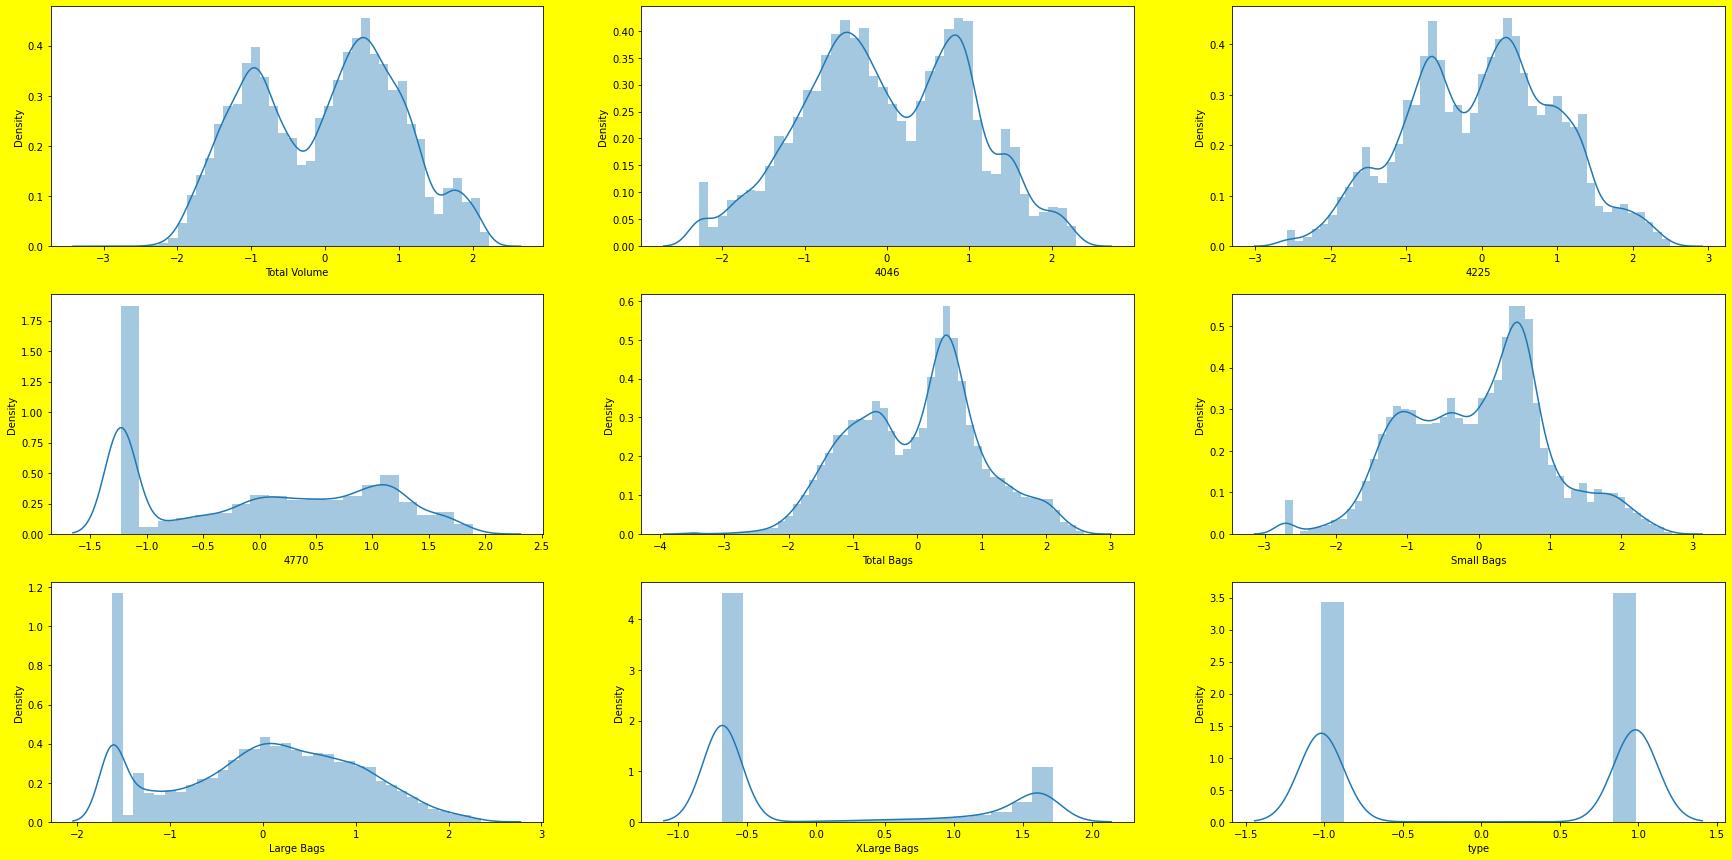

In [45]:
plt.figure(figsize=(30,15),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
    plotnumber=plotnumber+1

plt.show()

## Data Standardisation

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047
...,...,...,...,...,...,...,...,...,...
17646,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309
17647,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309
17648,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309
17649,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309


## Check for multicollierinity

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,53.307031,Total Volume
1,6.823349,4046
2,11.319775,4225
3,3.783190,4770
4,34.355031,Total Bags
5,16.558678,Small Bags
6,3.435400,Large Bags
7,1.966799,XLarge Bags
8,3.653029,type


We can observe that columns (Total volume,4225,Total Bags,Small Bags) are having VIF values greater than 5, So we can remove them

In [49]:
x=x.drop(columns=['Total Volume'],axis=1)

In [50]:
#Checking multicollierinity again
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,3.422700,4046
1,4.186874,4225
2,3.773005,4770
3,24.113086,Total Bags
4,16.557208,Small Bags
5,3.387349,Large Bags
6,1.951056,XLarge Bags
7,3.416430,type


In [51]:
#Removing one more columns and checking multicollierinity
x=x.drop(columns=['Total Bags'],axis=1)

In [52]:
#Checking multicollierinity again
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,3.413168,4046
1,4.064623,4225
2,3.767532,4770
3,3.572188,Small Bags
4,1.754239,Large Bags
5,1.950847,XLarge Bags
6,3.414293,type


We can see that multicollirinity is removed

# Training our model

## Using Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Finding the best random state

In [54]:
max_acc=0
max_rs=0

for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred_rf=rf.predict(x_test)
    accuracy=r2_score(y_test,pred_rf)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.7795367385846255 random state 0
max_accuracy 0.7795367385846255 max_random_state 0
Testing accuracy 0.7594948636368566 random state 1
Testing accuracy 0.7523182545197388 random state 2
Testing accuracy 0.7799783978131075 random state 3
max_accuracy 0.7799783978131075 max_random_state 3
Testing accuracy 0.7744329309823741 random state 4
Testing accuracy 0.780370605170529 random state 5
max_accuracy 0.780370605170529 max_random_state 5
Testing accuracy 0.7823959777729296 random state 6
max_accuracy 0.7823959777729296 max_random_state 6
Testing accuracy 0.770256846962182 random state 7
Testing accuracy 0.775962223235243 random state 8
Testing accuracy 0.7741373144006801 random state 9


We are getting maximum accuracy at random state 5

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
pred_test_y=rf.predict(x_test)
print("Testing Accuracy :-",r2_score(y_test,pred_test_y))

Testing Accuracy :- 0.7801397568092387


In [57]:
y_train_pred=rf.predict(x_train)
Train_accuracy=r2_score(y_train,y_train_pred)
Test_accuracy=r2_score(y_test,pred_test_y)


from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score in training is  {Train_accuracy} and the accuracy score in testing is {Test_accuracy}")

At cross fold 2 the cv score is -1.977322960363031 and the accuracy score in training is  0.9678106241780603 and the accuracy score in testing is 0.7801397568092387
At cross fold 3 the cv score is 0.0958286196561156 and the accuracy score in training is  0.9678106241780603 and the accuracy score in testing is 0.7801397568092387
At cross fold 4 the cv score is -0.12027154769897622 and the accuracy score in training is  0.9678106241780603 and the accuracy score in testing is 0.7801397568092387
At cross fold 5 the cv score is 0.1380213093119228 and the accuracy score in training is  0.9678106241780603 and the accuracy score in testing is 0.7801397568092387
At cross fold 6 the cv score is 0.13442967968325706 and the accuracy score in training is  0.9678106241780603 and the accuracy score in testing is 0.7801397568092387
At cross fold 7 the cv score is 0.2522390873020412 and the accuracy score in training is  0.9678106241780603 and the accuracy score in testing is 0.7801397568092387
At cros

We are getting least difference between testing accuracy and cross val score at cv=7

In [58]:
lssscore_selected=cross_val_score(rf,x,y,cv=7).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.2553626095054134


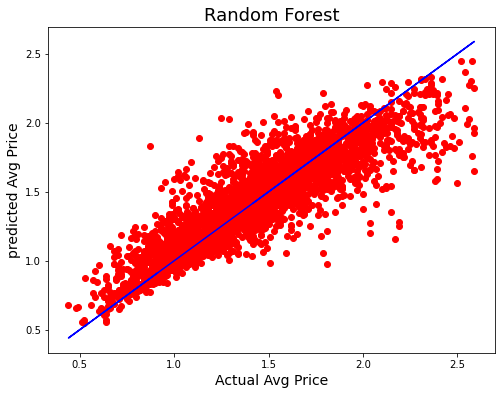

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_y,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Avg Price',fontsize=14)
plt.ylabel('predicted Avg Price',fontsize=14)
plt.title('Random Forest',fontsize=18)
plt.savefig('lr.png')
plt.show()


In [60]:
# Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test,pred_test_y))

#Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MAE: 0.1283698385726423
MSE: 0.03317734021806854
RMSE: 0.18214648011440832


### Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
params={'n_estimators':[10,20],
       'max_depth':[5,12],
       'min_samples_split':[3,4,6,7,8,9,10]}


In [63]:
clf=GridSearchCV(rf,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 12, 'min_samples_split': 3, 'n_estimators': 20}


In [64]:
rf=clf.best_estimator_

In [65]:
pred_test_y=rf.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.7422784990803986


### Cross validation Score

In [66]:
lssscore_selected=cross_val_score(rf,x,y,cv=7).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.2358621182808281


# ---------------------------------------------------xxxxxxxxxxx----------------------------------------

# Using KNN

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
knn=KNeighborsRegressor()

knn.fit(x_train,y_train)


pred_test_y=knn.predict(x_test)
print(r2_score(y_test,pred_test_y))

0.7547298629058078


In [69]:
lssscore_selected=cross_val_score(knn,x,y,cv=7).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.10274353092742916


### Hyperparameter Tuning

In [70]:
params={'leaf_size':[2,3,4,5,6,7,8,9,10],
       'n_neighbors':[3,5,7,9,11,13],
       'algorithm':['kd_tree','brute','ball_tree'],
       'weights':['uniform','distance']}


In [71]:
clf=GridSearchCV(knn,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 2, 'n_neighbors': 7, 'weights': 'distance'}


In [72]:
knn=clf.best_estimator_

In [73]:
pred_test_y=knn.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.7709788554927135


### Cross Validation Score

In [74]:
lssscore_selected=cross_val_score(knn,x,y,cv=7).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.13909294711106815


In [75]:
# Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test,pred_test_y))

#Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MAE: 0.13142277891075912
MSE: 0.03455973812353617
RMSE: 0.18590249628107786


# --------------------------------------------------xxxxxxxxxxxxxxxxx---------------------------------

# Using Support Vector Machine(SVM)

In [76]:
from sklearn.svm import SVR

In [77]:
svm=SVR()

In [78]:
svm.fit(x_train,y_train)


pred_test_y=svm.predict(x_test)
print("Testing Accuracy:-",r2_score(y_test,pred_test_y))

Testing Accuracy:- 0.6330578197698665


In [79]:
lssscore_selected=cross_val_score(svm,x,y,cv=7).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.24166443038804739


### Hyperparameter Tuning

In [80]:
params={'C':[0.1,1,10,100,1000],
       'gamma':[1,0.1,0.01,0.001],
       'kernel':['rbf'],
       'max_iter':[1,10,100,1000]}

In [81]:
clf=GridSearchCV(svm,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 1000}


In [82]:
svm=clf.best_estimator_

pred_test_y=svm.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.5449197034329811


### Cross Validation Score

In [83]:
lssscore_selected=cross_val_score(svm,x,y,cv=7).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.018910639148818503


In [84]:
# Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test,pred_test_y))

#Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MAE: 0.20571166915733186
MSE: 0.06867250580016626
RMSE: 0.26205439473545616


# --------------------------------------------------xxxxxxxxxxx-----------------------------------------

# Using X-Gradient Boosting

In [85]:
import xgboost as xgb

xgb=xgb.XGBRegressor()

xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [86]:
pred_test_y=xgb.predict(x_test)
print("Testing Accuracy:-",r2_score(y_test,pred_test_y))

Testing Accuracy:- 0.7356363894484714


In [87]:
lssscore_selected=cross_val_score(xgb,x,y,cv=7).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.21944783163826911


### Hyperparameter Tuning

In [88]:
params={'random_state':[1,10],
       'max_depth':[3,5,6,7,8,9,10],
       'max_leaves':[3,5,7,9,11,13,15],
       'n_estimators':[10,20]}

In [89]:
clf=GridSearchCV(xgb,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 10, 'max_leaves': 3, 'n_estimators': 20, 'random_state': 1}


In [90]:
xgb=clf.best_estimator_

pred_test_y=xgb.predict(x_test)

print("Testing Accuracy",r2_score(y_test,pred_test_y))


Testing Accuracy 0.7614057556349789


### Cross Validation Score

In [91]:
lssscore_selected=cross_val_score(xgb,x,y,cv=7).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.23377212492020066


In [92]:
# Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test,pred_test_y))

#Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MAE: 0.13818400016151045
MSE: 0.03600433759414637
RMSE: 0.18974808983003325


# Conclusion

We can observe that at random state 6 and cv=7 

SVM 

     ------Testing Accuracy:54.56 and Cross val score:1.8--------

Random Froest

     ------Testing Accuracy:75.16 and Cross val score:24.47--------

X Gradient Boosting

     ------Testing Accuracy:76.14 and Cross val score:23.37--------

KNN

    ------ Testing Accuracy:77.5 and Cross val score:13.8--------
    
    import pickle

Since in Random Forest the difference between testing accuracy and cross val is minimum


### Therefore Random Forest is best model .

## Saving the best model

In [93]:
import pickle

pickle.dump(rf,open('regmodel_avocado','wb'))

# ---------------------------------------xxxxxxxxxxxxxxxxxxxxx------------------------------------



# Task 2

In [94]:
#Now predicting region as as target varibale and doing analysis as a classification problem

In [95]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [96]:
x=df_new.drop(columns=['region','type','year','AveragePrice'],axis=1)
y=df_new['region']

# Removing skewness using Datatransfromation

In [97]:
from sklearn.preprocessing import power_transform


x_new=power_transform(x,method='yeo-johnson',)
x_new

array([[-0.07532391, -0.65742071,  0.35142978, ..., -0.34742097,
        -0.78115255, -0.67791909],
       [-0.14749743, -0.77717852,  0.26951276, ..., -0.31132237,
        -0.77119787, -0.67791909],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -0.374453  ,
        -0.75852256, -0.67791909],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ..., -0.31375554,
        -0.950743  , -0.67791909],
       [-0.70179733, -0.54701087, -0.71637127, ..., -0.25040812,
        -0.91606805, -0.67791909],
       [-0.66738095, -0.35967077, -0.79165015, ..., -0.21175518,
        -1.04811619, -0.67791909]])

In [98]:
x=pd.DataFrame(x_new,columns=x.columns)

In [99]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919
...,...,...,...,...,...,...,...,...
17646,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919
17647,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919
17648,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919
17649,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919


In [100]:
x.skew().sort_values()

Large Bags     -0.110913
4225           -0.044675
4046           -0.039282
Small Bags     -0.024405
Total Bags     -0.022204
Total Volume   -0.008642
4770            0.024168
XLarge Bags     0.853758
dtype: float64

### Data Standardisation

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919
...,...,...,...,...,...,...,...,...
17646,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919
17647,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919
17648,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919
17649,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919


### Check for multicollierinity

In [102]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,49.854448,Total Volume
1,6.802455,4046
2,11.191139,4225
3,3.403014,4770
4,33.871059,Total Bags
5,16.555636,Small Bags
6,3.431172,Large Bags
7,1.775941,XLarge Bags


In [104]:
#Removing one more columns and checking multicollierinity
x=x.drop(columns=['Total Bags'],axis=1)

In [105]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,35.469587,Total Volume
1,5.966339,4046
2,9.912571,4225
3,3.396514,4770
4,7.223180,Small Bags
5,1.975377,Large Bags
6,1.775101,XLarge Bags


In [106]:
#Removing one more columns and checking multicollierinity
x=x.drop(columns=['Total Volume'],axis=1)

In [107]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,3.298673,4046
1,3.948467,4225
2,3.396214,4770
3,3.553389,Small Bags
4,1.745591,Large Bags
5,1.775101,XLarge Bags


# Model Building

### KNN Classifier

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

### Finding the best random state

In [111]:
max_acc=0
max_rs=0

for i in range(0,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    pred_knn=knn.predict(x_test)
    accuracy=accuracy_score(y_test,pred_knn)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)

Testing accuracy 0.8309260832625318 random state 0
max_accuracy 0.8309260832625318 max_random_state 0
Testing accuracy 0.8241291418861513 random state 1
Testing accuracy 0.827810818465024 random state 2
Testing accuracy 0.8419711129991504 random state 3
max_accuracy 0.8419711129991504 max_random_state 3
Testing accuracy 0.8314924950438969 random state 4
Testing accuracy 0.8340413480600396 random state 5
Testing accuracy 0.836873406966865 random state 6
Testing accuracy 0.8397054658736902 random state 7
Testing accuracy 0.8382894364202775 random state 8
Testing accuracy 0.8300764655904843 random state 9
Testing accuracy 0.8229963183234211 random state 10
Testing accuracy 0.8300764655904843 random state 11
Testing accuracy 0.832625318606627 random state 12
Testing accuracy 0.8357405834041348 random state 13
Testing accuracy 0.8382894364202775 random state 14
Testing accuracy 0.8280940243557066 random state 15
Testing accuracy 0.8221467006513735 random state 16
Testing accuracy 0.83177570

Maximum Accuracy at random state 3

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.20)


In [113]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [114]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [115]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:89.015581%


In [116]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:84.197111%
Classification report
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        59
           1       0.83      0.81      0.82        74
           2       0.96      0.99      0.97        76
           3       0.85      0.80      0.82        75
           4       0.85      0.91      0.88        66
           5       0.80      0.72      0.76        74
           6       0.93      1.00      0.96        54
           7       0.78      0.91      0.84        56
           8       0.96      0.95      0.95        75
           9       0.85      0.86      0.85        64
          10       0.70      0.79      0.74        67
          11       0.82      0.96      0.88        51
          12       0.92      0.90      0.91        60
          13       0.73      0.84      0.78        61
          14       0.74      0.89      0.81        54
          15       0.92      0.97      0.95        63
          16       0.

In [117]:
y_pred=knn.predict(x_test)

### Confusion Matrix

In [118]:

conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[55,  0,  0, ...,  0,  0,  0],
       [ 0, 60,  0, ...,  0,  0,  0],
       [ 0,  0, 75, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 36,  0,  0],
       [ 0,  0,  0, ...,  0, 43,  0],
       [ 0,  0,  0, ...,  0,  0, 43]], dtype=int64)

### Finding best Cross validation score for logistic regression:

In [119]:
pred_knn=knn.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_knn)
for j in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 8.265756787344113

cv at  3
Cross validation score is :- 48.784219618461506

cv at  4
Cross validation score is :- 56.25125962010783

cv at  5
Cross validation score is :- 60.87477726618866

cv at  6
Cross validation score is :- 61.174851773680636

cv at  7
Cross validation score is :- 67.20789505460128

cv at  8
Cross validation score is :- 69.10568696568777

cv at  9
Cross validation score is :- 68.61286305057583



At cv =9 we are getting minimum difference testing accuracy and cross val score

### Cross Validation

In [120]:
lssscore_selected=cross_val_score(knn,x,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.6861286305057582


# Using Decision Tree 

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
dt=DecisionTreeClassifier()

In [123]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [124]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:100.000000%


In [125]:
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:76.125743%
Classification report
               precision    recall  f1-score   support

           0       0.69      0.75      0.72        59
           1       0.75      0.64      0.69        74
           2       0.92      0.89      0.91        76
           3       0.81      0.77      0.79        75
           4       0.85      0.88      0.87        66
           5       0.61      0.66      0.64        74
           6       0.94      0.94      0.94        54
           7       0.71      0.82      0.76        56
           8       0.97      0.89      0.93        75
           9       0.80      0.89      0.84        64
          10       0.78      0.67      0.72        67
          11       0.80      0.80      0.80        51
          12       0.84      0.87      0.85        60
          13       0.68      0.77      0.72        61
          14       0.62      0.74      0.67        54
          15       0.94      0.92      0.93        63
          16       0.

In [126]:
y_pred=dt.predict(x_test)

### Confusion Matrix

In [127]:


conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[44,  0,  0, ...,  0,  0,  0],
       [ 0, 47,  0, ...,  0,  0,  1],
       [ 0,  0, 68, ...,  0,  0,  0],
       ...,
       [ 0,  1,  0, ..., 34,  0,  0],
       [ 0,  0,  0, ...,  0, 37,  0],
       [ 0,  1,  0, ...,  0,  0, 40]], dtype=int64)

### Cross Validation

In [128]:
lssscore_selected=cross_val_score(dt,x,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.5979206082777717


# Using SVM

In [129]:
from sklearn.svm import SVC

In [130]:
svm=SVC()

In [131]:
svm.fit(x_train,y_train)

SVC()

In [132]:
metric_score(svm,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:75.148725%


In [133]:
metric_score(svm,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:74.341546%
Classification report
               precision    recall  f1-score   support

           0       0.62      0.88      0.73        59
           1       0.61      0.51      0.56        74
           2       0.96      0.96      0.96        76
           3       0.90      0.76      0.83        75
           4       0.75      0.70      0.72        66
           5       0.82      0.49      0.61        74
           6       0.89      1.00      0.94        54
           7       0.73      0.71      0.72        56
           8       0.86      0.95      0.90        75
           9       0.75      0.86      0.80        64
          10       0.60      0.66      0.63        67
          11       0.75      0.90      0.82        51
          12       0.75      0.85      0.80        60
          13       0.56      0.72      0.63        61
          14       0.70      0.85      0.77        54
          15       0.88      0.92      0.90        63
          16       0.

In [134]:
y_pred=svm.predict(x_test)

### Confusion Matrix

In [135]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[52,  0,  0, ...,  0,  0,  0],
       [ 0, 38,  0, ...,  0,  0,  0],
       [ 0,  0, 73, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 34,  0,  0],
       [ 0,  0,  0, ...,  0, 42,  0],
       [ 0,  0,  1, ...,  0,  0, 30]], dtype=int64)

### Cross Validation

In [136]:
lssscore_selected=cross_val_score(svm,x,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.6375208224207127


# Using Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rf=RandomForestClassifier()

In [139]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [140]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:100.000000%


In [141]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:87.170773%
Classification report
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        59
           1       0.84      0.76      0.79        74
           2       0.99      0.99      0.99        76
           3       0.93      0.89      0.91        75
           4       0.91      0.92      0.92        66
           5       0.83      0.77      0.80        74
           6       0.98      1.00      0.99        54
           7       0.85      0.89      0.87        56
           8       0.97      0.96      0.97        75
           9       0.88      0.92      0.90        64
          10       0.87      0.82      0.85        67
          11       0.87      0.94      0.91        51
          12       0.93      0.92      0.92        60
          13       0.78      0.92      0.84        61
          14       0.77      0.89      0.83        54
          15       0.97      0.98      0.98        63
          16       0.

### Confusion Matrix


In [142]:
y_pred=rf.predict(x_test)
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[54,  0,  0, ...,  0,  0,  0],
       [ 0, 56,  0, ...,  0,  0,  0],
       [ 0,  0, 75, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 36,  0,  0],
       [ 0,  0,  0, ...,  0, 45,  0],
       [ 0,  0,  0, ...,  0,  0, 46]], dtype=int64)

# Cross Validation

In [143]:
lssscore_selected=cross_val_score(rf,x,y,cv=9).mean()
print("the cv score is ",lssscore_selected)

the cv score is  0.7328120053583097


# Conclusion

### We can say Random Forest is best model for this dataset as it has highest accuracy 

### Hyperparameter Tuning

In [146]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[10,30],
       'max_depth':[5,30,2],
       'min_samples_split':[3,4,6,7,8,9,10]}


clf=GridSearchCV(rf,params)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'max_depth': 30, 'min_samples_split': 3, 'n_estimators': 30}


In [147]:
rf=RandomForestClassifier(max_depth=30,min_samples_split=3,n_estimators=30)

In [149]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_split=3, n_estimators=30)

In [150]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:99.837110%


In [151]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:86.434438%
Classification report
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        59
           1       0.84      0.78      0.81        74
           2       0.97      0.99      0.98        76
           3       0.92      0.89      0.91        75
           4       0.88      0.92      0.90        66
           5       0.81      0.73      0.77        74
           6       0.98      1.00      0.99        54
           7       0.86      0.89      0.88        56
           8       1.00      0.93      0.97        75
           9       0.84      0.91      0.87        64
          10       0.85      0.84      0.84        67
          11       0.83      0.94      0.88        51
          12       0.90      0.92      0.91        60
          13       0.76      0.90      0.83        61
          14       0.75      0.87      0.80        54
          15       0.92      0.97      0.95        63
          16       0.

In [152]:
#Saving the best model
import pickle
pickle.dump(rf,open('classmodel_avocado','wb'))